In [12]:
import pandas as pd
import time
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import seaborn as sns
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Generating Data

In [2]:
df = pd.DataFrame()
df['first_digit'] = [x for x in range(1,1001)]
df['pk'] = 1

In [3]:
df2 = df.merge(df,on='pk',how='outer').drop('pk',axis=1)

In [4]:
df2.head()

,first_digit_x,first_digit_y
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [5]:
df2.shape

(1000000, 2)

In [6]:
df2.rename(columns={'first_digit_x':'first_digit','first_digit_y':'second_digit'},inplace=True)

In [7]:
df2.head()

,first_digit,second_digit
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


Creation of Predict Column (Product of Digit 1 and 2)

In [8]:
df2['product'] = df2["first_digit"]*df2["second_digit"]

In [9]:
df2.tail()

,first_digit,second_digit,product
999995,1000,996,996000
999996,1000,997,997000
999997,1000,998,998000
999998,1000,999,999000
999999,1000,1000,1000000


# Train Test Split

In [10]:
X = df2.drop('product',axis=1)
y = df2['product']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [13]:
%%time
#linear-regression
lr_time_start = time.time()
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_time_stop = time.time()
print(f"LR Model Trained: {lr_time_stop-lr_time_start}")

#random-forest
rf_time_start = time.time()
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_time_stop = time.time()
print(f"RF Model Trained: {rf_time_stop-rf_time_start}")

#lgbm
lgbm_time_start = time.time()
lgr = LGBMRegressor()
lgr.fit(X_train,y_train)
lgbm_time_stop = time.time()
print(f"LGBM Model Trained: {lgbm_time_stop-lgbm_time_start}")

#xgboost
xgb_time_start = time.time()
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_time_stop = time.time()
print(f"XGB Model Trained: {xgb_time_stop-xgb_time_start}")


LR Model Trained: 0.0720815658569336
RF Model Trained: 180.18461346626282
LGBM Model Trained: 11.625603675842285
XGB Model Trained: 39.76494646072388
Wall time: 3min 52s


# Model Prediction

In [14]:
%%time
result = dict()

#linear-regression
result['lr_predict'] = lr.predict(X_test)

#random forest predict
result['rf_predict'] = rf.predict(X_test)

#lgbm prediction
result['lgr_predict'] = lgr.predict(X_test)

#xgboost
result['xgb_predict'] = xgb.predict(X_test)





Wall time: 16min 1s
Parser   : 132 ms


# Performance Metrics

In [ ]:
# print(f"RMSE Linear Regression: {np.sqrt(mean_squared_error(y_test,lr_predict))}")
# print(f"RMSE Random Forest: {np.sqrt(mean_squared_error(y_test,rf_predict))} ")
# print(f"MAPE Linear Regression: {mean_absolute_percentage_error(y_test,lr_predict)}")
# print(f"MAPE Random Forest: {mean_absolute_percentage_error(y_test,rf_predict)} ")

In [16]:
model_list = ['lr','rf','lgr','xgb']
result_metric = pd.DataFrame()
mape_list = []
rmse_list = []
for name in model_list:
    mape_list.append(mean_absolute_percentage_error(y_test,result[name+'_predict']))
    rmse_list.append(np.sqrt(mean_squared_error(y_test,result[name+'_predict'])))
    
result_metric['model'] = model_list
result_metric['rmse'] = rmse_list
result_metric['mape'] = mape_list

In [28]:
result_metric

,model,rmse,mape
0,lr,83290.710682,9.910874
1,rf,131.469938,0.000620
2,lgr,2662.215438,0.086208
3,xgb,2388.688438,0.032482


# Plots

<AxesSubplot:xlabel='model', ylabel='mape'>

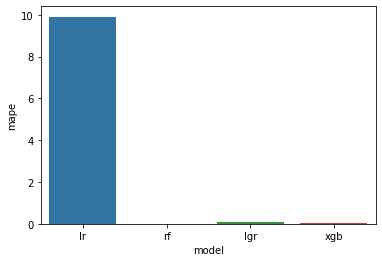

In [17]:
#MAPE Plot
sns.barplot(x='model',y='mape',data=result_metric)

<AxesSubplot:xlabel='model', ylabel='rmse'>

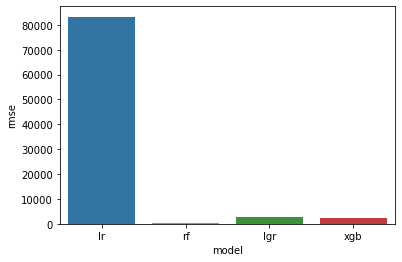

In [18]:
#RMSE Plot
sns.barplot(x='model',y='rmse',data=result_metric)

### Linear Regression Plot

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

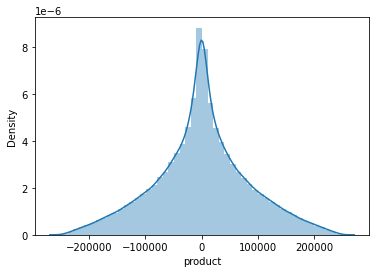

In [19]:
sns.distplot(y_test-result['lr_predict'])

### Random Forest Plot

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

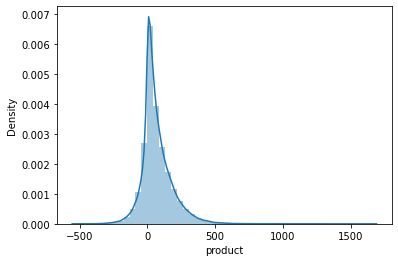

In [29]:
sns.distplot(y_test-result['rf_predict'],label='Random Forest')

### LGBM Plot

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

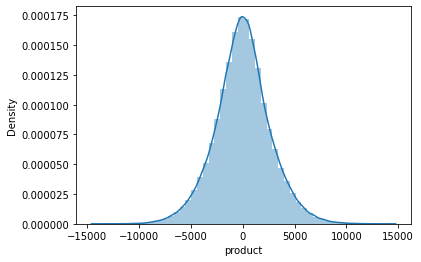

In [21]:
sns.distplot(y_test-result['lgr_predict'])

### XGB Plot

C:\Users\Himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='product', ylabel='Density'>

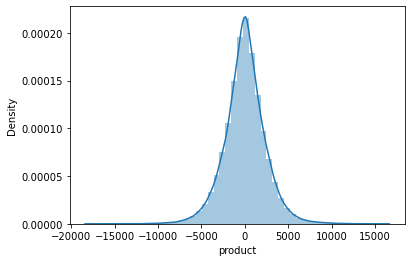

In [22]:
sns.distplot(y_test-result['xgb_predict'])

# Sample Output

In [25]:
output = X_test
output['actual'] = y_test
output['lr_preds'] = result['lr_predict']
output['rf_preds'] = result['rf_predict']
output['lgbm_preds'] = result['lgr_predict']
output['xgb_preds'] = result['xgb_predict']

C:\Users\Himanshu\AppData\Local\Temp/ipykernel_8772/2671227157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['actual'] = y_test
C:\Users\Himanshu\AppData\Local\Temp/ipykernel_8772/2671227157.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['lr_preds'] = result['lr_predict']
C:\Users\Himanshu\AppData\Local\Temp/ipykernel_8772/2671227157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [27]:
output.head(10)

,first_digit,second_digit,actual,lr_preds,rf_preds,lgbm_preds,xgb_preds
987231,988,232,229216,359998.497500,229107.48,224496.385311,230681.906250
79954,80,955,76400,267464.741612,76366.40,75345.929585,75733.351562
567130,568,131,74408,99227.383461,74470.07,76534.373474,74741.757812
500891,501,892,446892,446640.128118,446718.70,449977.185604,449500.406250
55399,56,400,22400,-22373.027014,22371.86,20784.822985,23189.798828
135049,136,50,6800,-157538.047811,6790.39,7400.050216,5965.392578
733378,734,379,278186,306456.635820,278094.27,280895.507783,288588.062500
732057,733,58,42514,145267.775005,42508.20,42988.111823,43026.046875
51333,52,334,17368,-57413.772113,17350.10,16041.192381,14137.807617
731479,732,480,351360,356014.891804,351244.69,349761.449046,351072.781250
